<a href="https://colab.research.google.com/github/07Sada/CIFAR-10_CNN_Model/blob/main/CIFAR_10_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Here we will train a CNN to classify images from the CIFAR-10 dataset.


## 1. Load CIFAR-10 Database

In [1]:
# Import the Keras library
import keras

# Import the CIFAR-10 dataset from the Keras datasets module
from keras.datasets import cifar10

# Load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


### 2. Visualize the First 24 Training Images

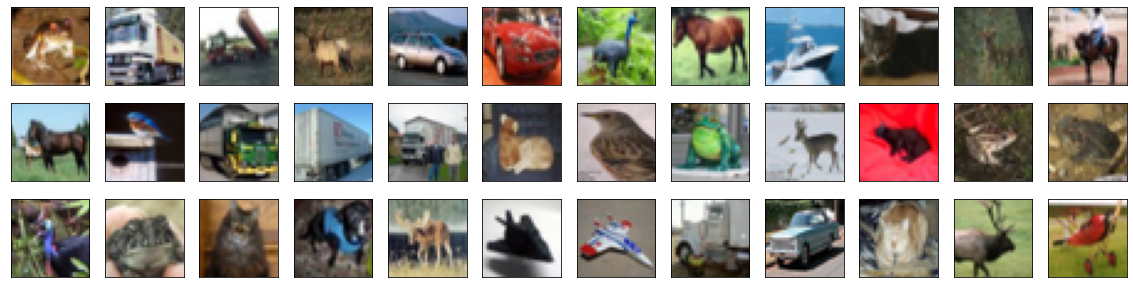

In [2]:
# Import numpy library
import numpy as np

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Display plots inline in notebooks
%matplotlib inline

# Create a figure object with a specified size
fig = plt.figure(figsize=(20,5))

# Loop over the first 36 images in the training dataset
for i in range(36):
    # Add a subplot to the figure
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    
    # Plot the image by removing any single-dimensional entries from its shape
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255
In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very
different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the
same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on
the right).

** Tip: ** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge.

In [3]:
# Normalize the pixel values of the training set
x_train = x_train.astype('float32') / 255

# Normalize the pixel values of the test set
x_test = x_test.astype('float32') / 255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
# Import np_utils module from keras.utils
from keras.utils import np_utils

# Import keras module from tensorflow
from tensorflow import keras

# One-hot encode the label
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# split the training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Print shape of the training set 
print('x_train shape', x_train.shape)

# Print number of training, validation and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples') 

x_train shape (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [5]:
# Import the required modules
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add a 2D Convolutional layer with 16 filters and kernel size 2x2
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))

# Add a Max Pooling layer with a pool size of 2x2
model.add(MaxPool2D(pool_size=2))

# Add another 2D Convolutional layer with 32 filters and kernel size 2x2
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

# Add another Max Pooling layer with a pool size of 2x2
model.add(MaxPool2D(pool_size =2))

# Add another 2D Convolutional layer with 64 filters and kernel size 2x2
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))

# Add another Max Pooling layer with a pool size of 2x2
model.add(MaxPool2D(pool_size=2))

# Add a Dropout layer with rate 0.3
model.add(Dropout(0.3))

# Add a Flatten layer to flatten the output from the previous layer
model.add(Flatten())

# Add a dense layer with 500 units and ReLU activation function
model.add(Dense(500, activation='relu'))

# Add another Dropout layer with rate 0.4
model.add(Dropout(0.4))

# Add a dense layer with 10 units and softmax activation function
model.add(Dense(10, activation='softmax'))

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

### 6. Compile the Model 

In [6]:
# Compile the model with categorical crossentropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [8]:
# Import the ModelCheckpoint callback from Keras
from keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint object to save the best model weights
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', # File path to save the weights
                               verbose=1, # Show a progress bar
                               save_best_only=True) # Only save the weights if the validation loss improves

# Train the model
hist = model.fit(x_train, y_train, # Train data
                 batch_size=32, # Number of samples per gradient update
                 epochs=10, # Number of times the entire dataset is passed through the model
                 validation_data=(x_valid, y_valid), # Validation data to evaluate the model during training
                 callbacks=[checkpointer], # Callback to save the best weights
                 verbose=2, # Show one line per epoch
                 shuffle=True) # Shuffle the training data after each epoch

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.25959, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 1.2640 - accuracy: 0.5486 - val_loss: 1.2596 - val_accuracy: 0.5590 - 6s/epoch - 4ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.25959 to 1.20206, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 1.1486 - accuracy: 0.5948 - val_loss: 1.2021 - val_accuracy: 0.6022 - 6s/epoch - 5ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 1.20206
1407/1407 - 6s - loss: 1.0818 - accuracy: 0.6203 - val_loss: 1.2504 - val_accuracy: 0.5806 - 6s/epoch - 4ms/step
Epoch 4/10

Epoch 4: val_loss improved from 1.20206 to 1.03053, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 1.0463 - accuracy: 0.6358 - val_loss: 1.0305 - val_accuracy: 0.6458 - 6s/epoch - 5ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 1.03053
1407/1407 - 6s - loss: 1.0259 - accuracy: 0.6459 - val_loss: 1.0841 - val_accuracy: 0.6438 - 6s/epoch - 4ms/step
Epoch 6/1

### 8. Load the Model with the Best Validation Accuracy

In [9]:
# get predictions on the test set
y_hat = model.predict(x_test) # Use the trained model to make predictions on the test set and store the result in y_hat

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 
# Define text labels for each of the 10 classes in the CIFAR-10 dataset. These labels can be used to interpret the predictions made by the model.

313/313 [==============================] - 1s 2ms/step


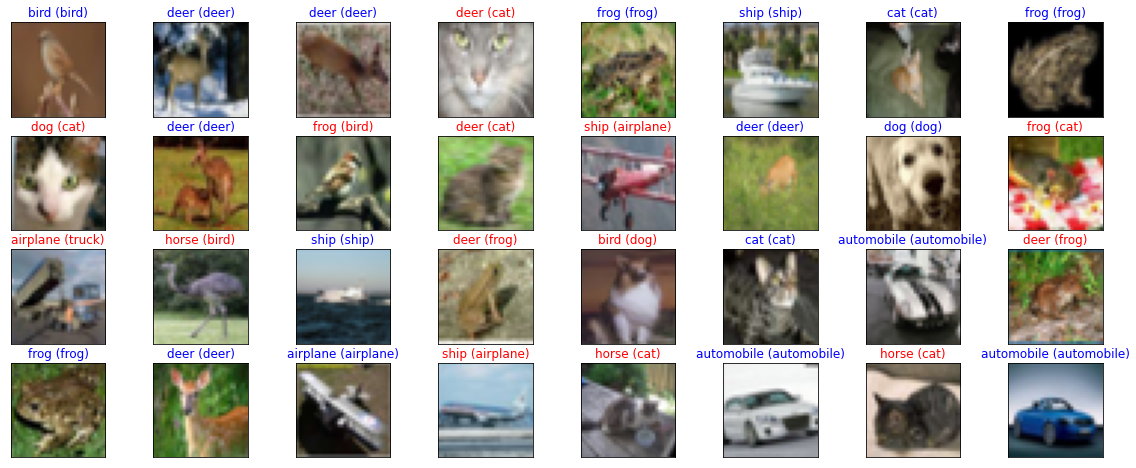

In [10]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8)) # Create a figure with a specified size
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[]) # Create an axes object for each image and remove the x and y tick marks
    ax.imshow(np.squeeze(x_test[idx])) # Display the image on the axes
    pred_idx = np.argmax(y_hat[idx]) # Calculate the predicted label by finding the index of the highest prediction score in y_hat
    true_idx = np.argmax(y_test[idx]) # Calculate the true label by finding the index of the highest prediction score in y_test
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]), # Set the title of the axes to display the predicted and true labels
                 color=("blue" if pred_idx == true_idx else "red")) # Color the title blue if the predicted label matches the true label, and red if they don't match
